<center><h1>Module 2 Assignment</h1></center>

# Choose a dataset

Choose a dataset from [NYC Open Data](https://opendata.cityofnewyork.us/) that is available in CSV format (look at the format labels in the list of datasets). Choose one that has at least 2 numerical value columns and 1 string value column. 

If it's a CSV file you may be able to directly read it with pandas
```
pd.read_csv(url)
```

If it is a compressed file (.zip, .gz, etc.), download the zip and unpack it, then read it in with pandas
```
pd.read_csv(<filename>.csv)
```

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

In [2]:
# !pip install matplotlib --upgrade

In [3]:
df = pd.read_csv("Infant_Mortality.csv")

## Display top 7 rows of the dataframe in your notebook

In [4]:
df.head(7)

,Year,Materal Race or Ethnicity,Infant Mortality Rate,Neonatal Mortality Rate,Postneonatal Mortality Rate,Infant Deaths,Neonatal Infant Deaths,Postneonatal Infant Deaths,Number of Live Births
0,2007,Black Non-Hispanic,9.8,6.0,3.8,287.0,177.0,110.0,29268
1,2013,Other Hispanic,4.3,2.6,1.7,120.0,72.0,48.0,27621
2,2013,Black Non-Hispanic,8.3,5.5,2.9,201.0,132.0,69.0,24108
3,2008,White Non-Hispanic,3.3,2.1,1.1,125.0,82.0,43.0,38383
4,2009,Black Non-Hispanic,9.5,5.8,3.7,259.0,158.0,101.0,27405
5,2010,Black Non-Hispanic,8.6,5.6,3.1,230.0,148.0,82.0,26635
6,2010,White Non-Hispanic,2.8,2.0,0.8,104.0,75.0,29.0,37780


## Count number of null values (if any) for each column

In [5]:
df.isna().sum()

Year                            0
Materal Race or Ethnicity       0
Infant Mortality Rate          12
Neonatal Mortality Rate        12
Postneonatal Mortality Rate    14
Infant Deaths                  12
Neonatal Infant Deaths         12
Postneonatal Infant Deaths     12
Number of Live Births           0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 64
Data columns (total 9 columns):
Year                           53 non-null int64
Materal Race or Ethnicity      53 non-null object
Infant Mortality Rate          53 non-null float64
Neonatal Mortality Rate        53 non-null float64
Postneonatal Mortality Rate    53 non-null float64
Infant Deaths                  53 non-null float64
Neonatal Infant Deaths         53 non-null float64
Postneonatal Infant Deaths     53 non-null float64
Number of Live Births          53 non-null int64
dtypes: float64(6), int64(2), object(1)
memory usage: 4.1+ KB


## Remove all but 2 numerical values columns of your choice and display the reducted dataframe.

In [8]:
df.drop(['Year', 'Materal Race or Ethnicity', 'Postneonatal Mortality Rate', 'Infant Deaths', 
'Neonatal Infant Deaths', 'Postneonatal Infant Deaths', 'Number of Live Births'], axis=1, inplace=True)

In [9]:
df.head()

,Infant Mortality Rate,Neonatal Mortality Rate
0,9.8,6.0
1,4.3,2.6
2,8.3,5.5
3,3.3,2.1
4,9.5,5.8


## Display the average, median, and standard deviation of each of your numerical columns

In [10]:
df.describe()

,Infant Mortality Rate,Neonatal Mortality Rate
count,53.000000,53.000000
mean,5.041509,3.313208
std,2.271600,1.432727
min,2.400000,1.600000
25%,3.100000,2.100000
50%,4.300000,2.700000
75%,6.600000,4.500000
max,10.200000,6.500000


## Plot two of the numerical columns one against the other in a scatter plot

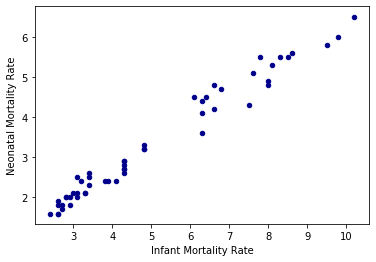

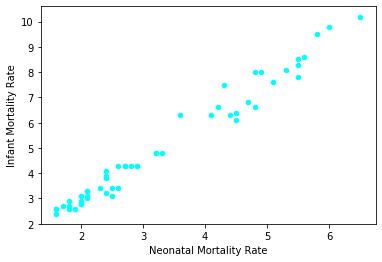

In [11]:
ax1 = df.plot.scatter(x='Infant Mortality Rate', y='Neonatal Mortality Rate', c='DarkBlue')
ax2 = df.plot.scatter(x='Neonatal Mortality Rate', y='Infant Mortality Rate', c='cyan')

## Plot the data distribution of all your numerical columns in histogram and boxplot

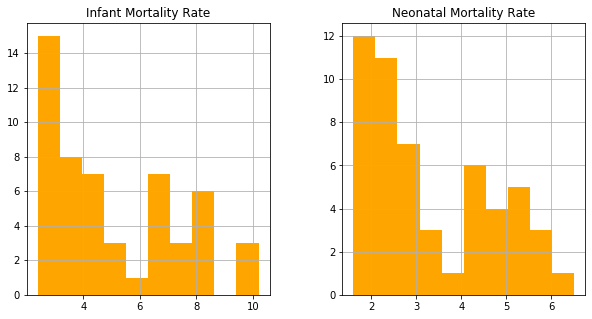

In [12]:
data_hist_plot = df.hist(figsize = (10,5), color = "orange")

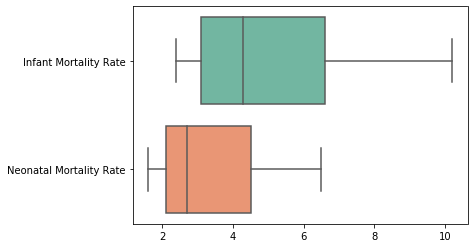

In [13]:
box = sns.boxplot(data=df, orient="h", palette="Set2")

## Create a new column in the same dataframe that is raised power of two of an existing column
Example:
![power_of_two](images/ex1.jpeg)


In [14]:
df['Infant Mortality Rate^2']=np.power((df['Infant Mortality Rate']),2)
df['Neonatal Mortality Rate^2']=np.power((df['Neonatal Mortality Rate']),2)

In [15]:
df.head()

,Infant Mortality Rate,Neonatal Mortality Rate,Infant Mortality Rate^2,Neonatal Mortality Rate^2
0,9.8,6.0,96.04,36.00
1,4.3,2.6,18.49,6.76
2,8.3,5.5,68.89,30.25
3,3.3,2.1,10.89,4.41
4,9.5,5.8,90.25,33.64


# Citi Bike investigation
![citi-bike](images/citibike.jpeg)
>Citi Bike is the largest bike share program in the US, with 20,000 bikes and over 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

## Choose a citibikes dataset (one or two months, earlier datasets are convenient because they are smaller)

Example for downloading September 2017 Citibike data:
```
! month=201709
! curl https://s3.amazonaws.com/tripdata/$month-citibike-tripdata.csv.zip >> $month-citibike-tripdata.csv.zip
! unzip $month-citibike-tripdata.csv.zip
```

In [16]:
# Web scraping libraries
import requests
import urllib.request
from bs4 import BeautifulSoup

# Downloading, moving and unzipping files
import webbrowser
from time import sleep
import shutil
import os
from zipfile import ZipFile

# DataFrame exploration and manipulation
import pandas as pd
from glob import glob

# PostgreSQL interaction
# import psycopg2
# import linecache
# from psycopg2 import sql
# from psycopg2 import Error
# from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

In [17]:
url = 'https://s3.amazonaws.com/tripdata/'
response = requests.get(url)
response

<Response [200]>

In [18]:
soup = BeautifulSoup(response.text, 'xml')
soup

<?xml version="1.0" encoding="utf-8"?>
<ListBucketResult xmlns="http://s3.amazonaws.com/doc/2006-03-01/"><Name>tripdata</Name><Prefix/><Marker/><MaxKeys>1000</MaxKeys><IsTruncated>false</IsTruncated><Contents><Key>201306-citibike-tripdata.zip</Key><LastModified>2018-04-30T13:18:55.000Z</LastModified><ETag>"b520a12de58eea58a3586f89bfcfbd9d-2"</ETag><Size>16785103</Size><StorageClass>STANDARD</StorageClass></Contents><Contents><Key>201307-201402-citibike-tripdata.zip</Key><LastModified>2017-01-18T22:23:25.000Z</LastModified><ETag>"7b3b260b2ab2e5349320121d04bd821c-22"</ETag><Size>178262576</Size><StorageClass>STANDARD</StorageClass></Contents><Contents><Key>201307-citibike-tripdata.zip</Key><LastModified>2017-01-18T22:23:27.000Z</LastModified><ETag>"dd3e6fd5f91715b31eae72868086c08c-4"</ETag><Size>27074629</Size><StorageClass>STANDARD</StorageClass></Contents><Contents><Key>201308-citibike-tripdata.zip</Key><LastModified>2017-01-18T22:23:27.000Z</LastModified><ETag>"2f661063576734f614b9f1d

In [19]:
data_files = soup.find_all('Key')
data_files

[<Key>201306-citibike-tripdata.zip</Key>,
 <Key>201307-201402-citibike-tripdata.zip</Key>,
 <Key>201307-citibike-tripdata.zip</Key>,
 <Key>201308-citibike-tripdata.zip</Key>,
 <Key>201309-citibike-tripdata.zip</Key>,
 <Key>201310-citibike-tripdata.zip</Key>,
 <Key>201311-citibike-tripdata.zip</Key>,
 <Key>201312-citibike-tripdata.zip</Key>,
 <Key>201401-citibike-tripdata.zip</Key>,
 <Key>201402-citibike-tripdata.zip</Key>,
 <Key>201403-citibike-tripdata.zip</Key>,
 <Key>201404-citibike-tripdata.zip</Key>,
 <Key>201405-citibike-tripdata.zip</Key>,
 <Key>201406-citibike-tripdata.zip</Key>,
 <Key>201407-citibike-tripdata.zip</Key>,
 <Key>201408-citibike-tripdata.zip</Key>,
 <Key>201409-citibike-tripdata.zip</Key>,
 <Key>201410-citibike-tripdata.zip</Key>,
 <Key>201411-citibike-tripdata.zip</Key>,
 <Key>201412-citibike-tripdata.zip</Key>,
 <Key>201501-citibike-tripdata.zip</Key>,
 <Key>201502-citibike-tripdata.zip</Key>,
 <Key>201503-citibike-tripdata.zip</Key>,
 <Key>201504-citibike-tripd

In [20]:
# # Instantiate empty list
# zip_files = []# Populate list with zip file names
# for file in range(len(data_files)-1):
#     zip_files.append(data_files[file].get_text())# Download Jersey City zip files
# for file in zip_files:
#     if 'JC' in file:
#         webbrowser.open_new(url + file)
#         sleep(7)

In [21]:
df_201510=pd.read_csv('C:/Users/Karimah/Documents/Git/klasa_mod2/work_page/Data/JC-201510-citibike-tripdata.csv')

In [22]:
df_201510.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,3212,Christ Hospital,40.734786,-74.050444,3207,Oakland Ave,40.737604,-74.052478,24470,Subscriber,1960.0,1
1,739,2015-10-01 00:27:12,2015-10-01 00:39:32,3207,Oakland Ave,40.737604,-74.052478,3212,Christ Hospital,40.734786,-74.050444,24481,Subscriber,1960.0,1
2,2714,2015-10-01 00:32:46,2015-10-01 01:18:01,3193,Lincoln Park,40.724605,-74.078406,3193,Lincoln Park,40.724605,-74.078406,24628,Subscriber,1983.0,1
3,275,2015-10-01 00:34:31,2015-10-01 00:39:06,3199,Newport Pkwy,40.728745,-74.032108,3187,Warren St,40.721124,-74.038051,24613,Subscriber,1975.0,1
4,561,2015-10-01 00:40:12,2015-10-01 00:49:33,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,24668,Customer,NaN,0


In [23]:
df_201510.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19264 entries, 0 to 19263
Data columns (total 15 columns):
Trip Duration              19264 non-null int64
Start Time                 19264 non-null object
Stop Time                  19264 non-null object
Start Station ID           19264 non-null int64
Start Station Name         19264 non-null object
Start Station Latitude     19264 non-null float64
Start Station Longitude    19264 non-null float64
End Station ID             19264 non-null int64
End Station Name           19264 non-null object
End Station Latitude       19264 non-null float64
End Station Longitude      19264 non-null float64
Bike ID                    19264 non-null int64
User Type                  19264 non-null object
Birth Year                 16967 non-null float64
Gender                     19264 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 2.2+ MB


## Count the number of missing values of each column

In [24]:
df_201510.isna().sum()

Trip Duration                 0
Start Time                    0
Stop Time                     0
Start Station ID              0
Start Station Name            0
Start Station Latitude        0
Start Station Longitude       0
End Station ID                0
End Station Name              0
End Station Latitude          0
End Station Longitude         0
Bike ID                       0
User Type                     0
Birth Year                 2297
Gender                        0
dtype: int64

In [25]:
df_201510.shape

(19264, 15)

In [26]:
df_201510.dropna(inplace=True)

In [27]:
df_201510.shape

(16967, 15)

## Who rides citibikes? Show ridership distribution by gender, user type, and age
Process the data and plot your answers

In [28]:
df_201510['Age']=2021.0-df_201510['Birth Year']

In [29]:
df_201510.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Age
0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,3212,Christ Hospital,40.734786,-74.050444,3207,Oakland Ave,40.737604,-74.052478,24470,Subscriber,1960.0,1,61.0
1,739,2015-10-01 00:27:12,2015-10-01 00:39:32,3207,Oakland Ave,40.737604,-74.052478,3212,Christ Hospital,40.734786,-74.050444,24481,Subscriber,1960.0,1,61.0
2,2714,2015-10-01 00:32:46,2015-10-01 01:18:01,3193,Lincoln Park,40.724605,-74.078406,3193,Lincoln Park,40.724605,-74.078406,24628,Subscriber,1983.0,1,38.0
3,275,2015-10-01 00:34:31,2015-10-01 00:39:06,3199,Newport Pkwy,40.728745,-74.032108,3187,Warren St,40.721124,-74.038051,24613,Subscriber,1975.0,1,46.0
6,139,2015-10-01 00:43:44,2015-10-01 00:46:03,3206,Hilltop,40.731169,-74.057574,3195,Sip Ave,40.730743,-74.063784,24482,Subscriber,1988.0,1,33.0


In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_201510['Label User Type']= le.fit_transform(df_201510['User Type'])

In [31]:
df_201510.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Age,Label User Type
0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,3212,Christ Hospital,40.734786,-74.050444,3207,Oakland Ave,40.737604,-74.052478,24470,Subscriber,1960.0,1,61.0,0
1,739,2015-10-01 00:27:12,2015-10-01 00:39:32,3207,Oakland Ave,40.737604,-74.052478,3212,Christ Hospital,40.734786,-74.050444,24481,Subscriber,1960.0,1,61.0,0
2,2714,2015-10-01 00:32:46,2015-10-01 01:18:01,3193,Lincoln Park,40.724605,-74.078406,3193,Lincoln Park,40.724605,-74.078406,24628,Subscriber,1983.0,1,38.0,0
3,275,2015-10-01 00:34:31,2015-10-01 00:39:06,3199,Newport Pkwy,40.728745,-74.032108,3187,Warren St,40.721124,-74.038051,24613,Subscriber,1975.0,1,46.0,0
6,139,2015-10-01 00:43:44,2015-10-01 00:46:03,3206,Hilltop,40.731169,-74.057574,3195,Sip Ave,40.730743,-74.063784,24482,Subscriber,1988.0,1,33.0,0


In [32]:
df_201510['User Type'].value_counts()

Subscriber    16967
Name: User Type, dtype: int64

In [33]:
df_201510['Label User Type'].value_counts()

0    16967
Name: Label User Type, dtype: int64

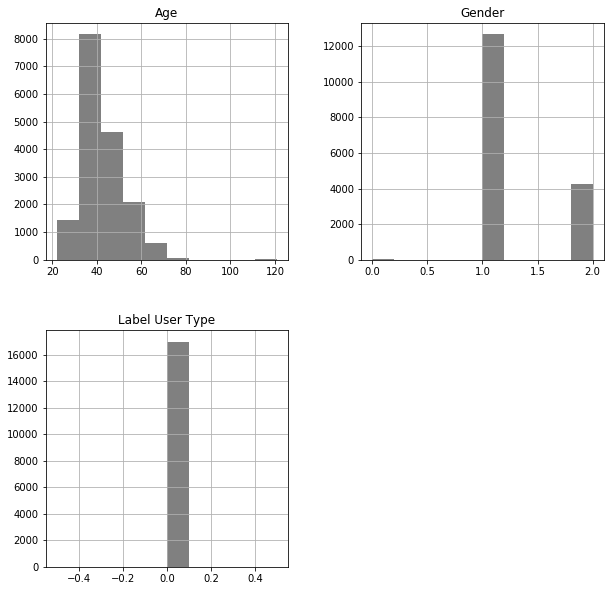

In [34]:
# 0 = Unknown; 1 = Male; 2 = Female
# 0 = Subscriber = Annual Member; 1 = Customer = 24-hour pass or 3-day pass user;

data_hist_plot_citi = df_201510[['Gender', 'Label User Type', 'Age']].hist(figsize = (10,10), color = "gray")

## What is the average number of trips per day?

In [35]:
df_201510['Start Time'] = pd.to_datetime(df_201510['Start Time'])
df_201510['Stop Time'] = pd.to_datetime(df_201510['Stop Time'])

In [36]:
df_201510.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16967 entries, 0 to 19262
Data columns (total 17 columns):
Trip Duration              16967 non-null int64
Start Time                 16967 non-null datetime64[ns]
Stop Time                  16967 non-null datetime64[ns]
Start Station ID           16967 non-null int64
Start Station Name         16967 non-null object
Start Station Latitude     16967 non-null float64
Start Station Longitude    16967 non-null float64
End Station ID             16967 non-null int64
End Station Name           16967 non-null object
End Station Latitude       16967 non-null float64
End Station Longitude      16967 non-null float64
Bike ID                    16967 non-null int64
User Type                  16967 non-null object
Birth Year                 16967 non-null float64
Gender                     16967 non-null int64
Age                        16967 non-null float64
Label User Type            16967 non-null int32
dtypes: datetime64[ns](2), float64(6), int

In [37]:
# [Average of trips per day] = [Total trip]/365

count_trip = df_201510['Start Time'].count()
avg_trip_perday = count_trip/365

print("Average number trips perday :", avg_trip_perday)

Average number trips perday : 46.484931506849314


## What is the average trip duration?

In [38]:
df_201510['Duration']= df_201510['Stop Time']-df_201510['Start Time']

In [39]:
df_201510.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Age,Label User Type,Duration
0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,3212,Christ Hospital,40.734786,-74.050444,3207,Oakland Ave,40.737604,-74.052478,24470,Subscriber,1960.0,1,61.0,0,00:06:16
1,739,2015-10-01 00:27:12,2015-10-01 00:39:32,3207,Oakland Ave,40.737604,-74.052478,3212,Christ Hospital,40.734786,-74.050444,24481,Subscriber,1960.0,1,61.0,0,00:12:20
2,2714,2015-10-01 00:32:46,2015-10-01 01:18:01,3193,Lincoln Park,40.724605,-74.078406,3193,Lincoln Park,40.724605,-74.078406,24628,Subscriber,1983.0,1,38.0,0,00:45:15
3,275,2015-10-01 00:34:31,2015-10-01 00:39:06,3199,Newport Pkwy,40.728745,-74.032108,3187,Warren St,40.721124,-74.038051,24613,Subscriber,1975.0,1,46.0,0,00:04:35
6,139,2015-10-01 00:43:44,2015-10-01 00:46:03,3206,Hilltop,40.731169,-74.057574,3195,Sip Ave,40.730743,-74.063784,24482,Subscriber,1988.0,1,33.0,0,00:02:19


In [40]:
avg_trip_duration = df_201510['Duration'].mean()

print("Average Trip Duration:", avg_trip_duration)

Average Trip Duration: 0 days 00:11:50.512347


## What days of the week are most rides taken on?
Process the data and plot your answer

In [41]:
df_201510['Start Day'] = df_201510['Start Time'].dt.weekday_name

In [42]:
df_201510.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Age,Label User Type,Duration,Start Day
0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,3212,Christ Hospital,40.734786,-74.050444,3207,Oakland Ave,40.737604,-74.052478,24470,Subscriber,1960.0,1,61.0,0,00:06:16,Thursday
1,739,2015-10-01 00:27:12,2015-10-01 00:39:32,3207,Oakland Ave,40.737604,-74.052478,3212,Christ Hospital,40.734786,-74.050444,24481,Subscriber,1960.0,1,61.0,0,00:12:20,Thursday
2,2714,2015-10-01 00:32:46,2015-10-01 01:18:01,3193,Lincoln Park,40.724605,-74.078406,3193,Lincoln Park,40.724605,-74.078406,24628,Subscriber,1983.0,1,38.0,0,00:45:15,Thursday
3,275,2015-10-01 00:34:31,2015-10-01 00:39:06,3199,Newport Pkwy,40.728745,-74.032108,3187,Warren St,40.721124,-74.038051,24613,Subscriber,1975.0,1,46.0,0,00:04:35,Thursday
6,139,2015-10-01 00:43:44,2015-10-01 00:46:03,3206,Hilltop,40.731169,-74.057574,3195,Sip Ave,40.730743,-74.063784,24482,Subscriber,1988.0,1,33.0,0,00:02:19,Thursday


In [43]:
df_count_weekdays = pd.DataFrame(df_201510['Start Day'].value_counts(ascending=True))

In [44]:
df_count_weekdays.reset_index(inplace=True)

In [45]:
df_count_weekdays.rename(columns={'Start Day': 'Count days of the trip', 'index': 'Days'}, inplace=True)

In [46]:
df_count_weekdays

,Days,Count days of the trip
0,Sunday,1715
1,Saturday,2074
2,Wednesday,2417
3,Monday,2442
4,Friday,2522
5,Tuesday,2669
6,Thursday,3128


In [47]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_count_weekdays['Days'] = pd.Categorical(df_count_weekdays['Days'], categories=cats, ordered=True)

In [48]:
df_count_weekdays.sort_values('Days')

,Days,Count days of the trip
3,Monday,2442
5,Tuesday,2669
2,Wednesday,2417
6,Thursday,3128
4,Friday,2522
1,Saturday,2074
0,Sunday,1715


In [49]:
df_count_weekdays.sort_values('Count days of the trip', ascending=False)

,Days,Count days of the trip
6,Thursday,3128
5,Tuesday,2669
4,Friday,2522
3,Monday,2442
2,Wednesday,2417
1,Saturday,2074
0,Sunday,1715


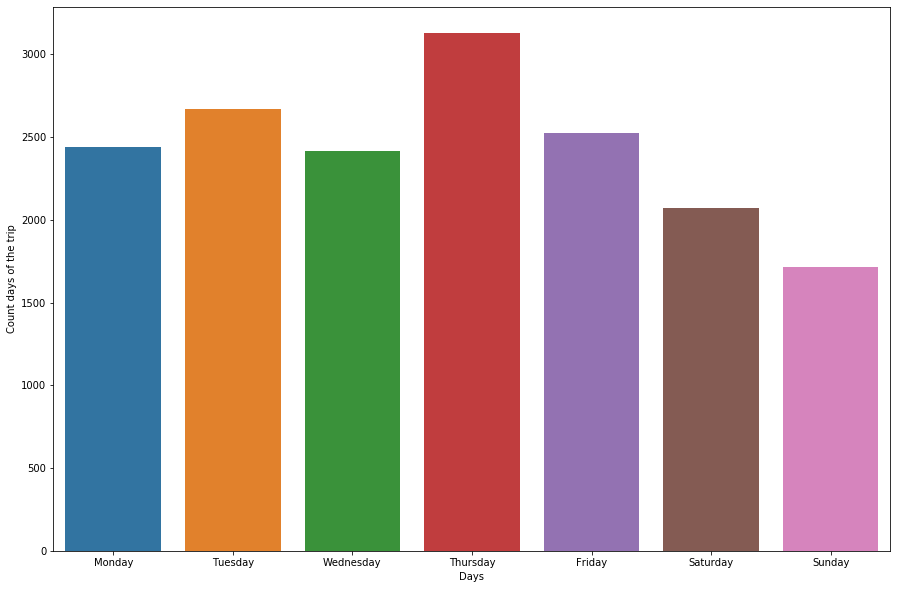

In [50]:
from matplotlib import pyplot

a4_dims = (15, 10)
fig, ax,= pyplot.subplots(figsize=a4_dims)

ax = sns.barplot(data=df_count_weekdays, x= 'Days', y="Count days of the trip")
# ax.bar_label(ax.containers[0])

Asnwer :
The days of the week are the most traveled are thursdays, then the second position is occupied by tuesdays 

## What hour of the day are most rides taken on?
Process the data and plot your answer

In [51]:
df_201510['Start Hour'] = df_201510['Start Time'].dt.hour

In [52]:
df_201510.tail()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Age,Label User Type,Duration,Start Day,Start Hour
19257,185,2015-10-31 23:33:00,2015-10-31 23:36:06,3186,Grove St PATH,40.719586,-74.043117,3213,Van Vorst Park,40.718489,-74.047727,24714,Subscriber,1982.0,2,39.0,0,00:03:06,Saturday,23
19258,533,2015-10-31 23:33:21,2015-10-31 23:42:15,3195,Sip Ave,40.730743,-74.063784,3225,Baldwin at Montgomery,40.723659,-74.064194,24452,Subscriber,1947.0,1,74.0,0,00:08:54,Saturday,23
19259,509,2015-10-31 23:34:26,2015-10-31 23:42:55,3195,Sip Ave,40.730743,-74.063784,3225,Baldwin at Montgomery,40.723659,-74.064194,24544,Subscriber,1949.0,2,72.0,0,00:08:29,Saturday,23
19261,229,2015-10-31 23:47:34,2015-10-31 23:51:23,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24443,Subscriber,1996.0,2,25.0,0,00:03:49,Saturday,23
19262,196,2015-10-31 23:48:44,2015-10-31 23:52:00,3186,Grove St PATH,40.719586,-74.043117,3185,City Hall,40.717733,-74.043845,24592,Subscriber,1986.0,1,35.0,0,00:03:16,Saturday,23


In [53]:
df_count_hour = pd.DataFrame(df_201510['Start Hour'].value_counts(ascending=True))

In [54]:
df_count_hour.reset_index(inplace=True)

In [55]:
df_count_hour.rename(columns={'Start Hour': 'Count Hour', 'index': 'Hour'}, inplace=True)

In [56]:
df_count_hour.sort_values('Hour')

,Hour,Count Hour
5,0,174
3,1,84
2,2,48
1,3,20
0,4,16
4,5,102
7,6,413
18,7,1061
23,8,2129
19,9,1086


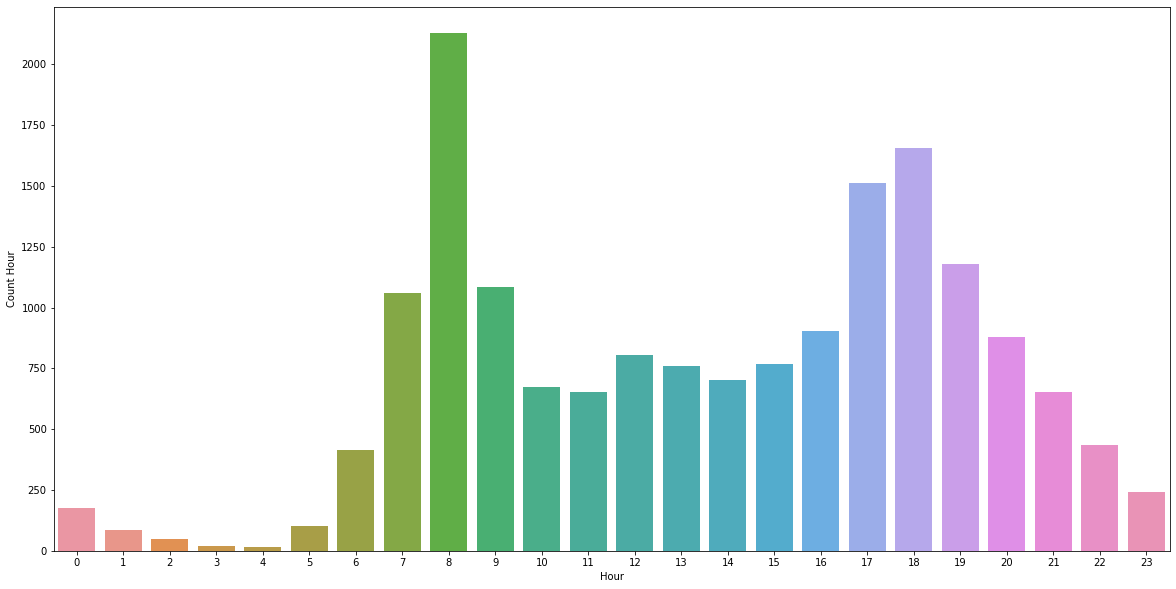

In [57]:
from matplotlib import pyplot

a4_dims = (20, 10)
fig, ax2,= pyplot.subplots(figsize=a4_dims)

ax2 = sns.barplot(data=df_count_hour, x= 'Hour', y="Count Hour")

Answer : 
The hour of the day is that most of the trips made are at 8 am, followed by the second position is at 18/6 pm 

## Is there correlation between age and trip duration?

In [58]:
df_201510.rename(columns={'Trip Duration': 'Trip_Duration'}, inplace=True)

In [59]:
df_201510['Age'].corr(df_201510['Trip_Duration'])

0.015938575580309113

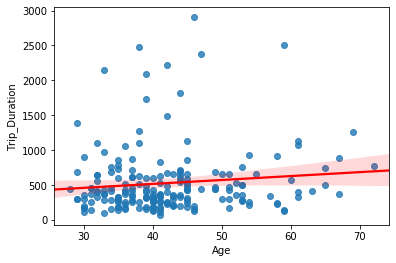

In [60]:
sns.regplot(data=df_201510.sample(200, random_state=1), 
            x="Age", y="Trip_Duration",
            line_kws={"color": "red"})

In [61]:
df_mean_perage = df_201510.groupby('Age', as_index=False).Trip_Duration.mean()

In [62]:
Top10_mean_dur_perage = pd.DataFrame(df_mean_perage.sort_values('Trip_Duration', ascending=False).head(10))

In [63]:
Top10_mean_dur_perage.head(5)

,Age,Trip_Duration
43,66.0,2435.428571
37,60.0,1630.862069
8,31.0,1355.203426
53,77.0,1252.235294
41,64.0,1206.763889


In [64]:
Top10_mean_dur_perage.sort_values('Trip_Duration', ascending=False)

,Age,Trip_Duration
43,66.0,2435.428571
37,60.0,1630.862069
8,31.0,1355.203426
53,77.0,1252.235294
41,64.0,1206.763889
31,54.0,1121.594286
42,65.0,1087.304054
29,52.0,1011.757848
44,67.0,988.069930
32,55.0,969.315789


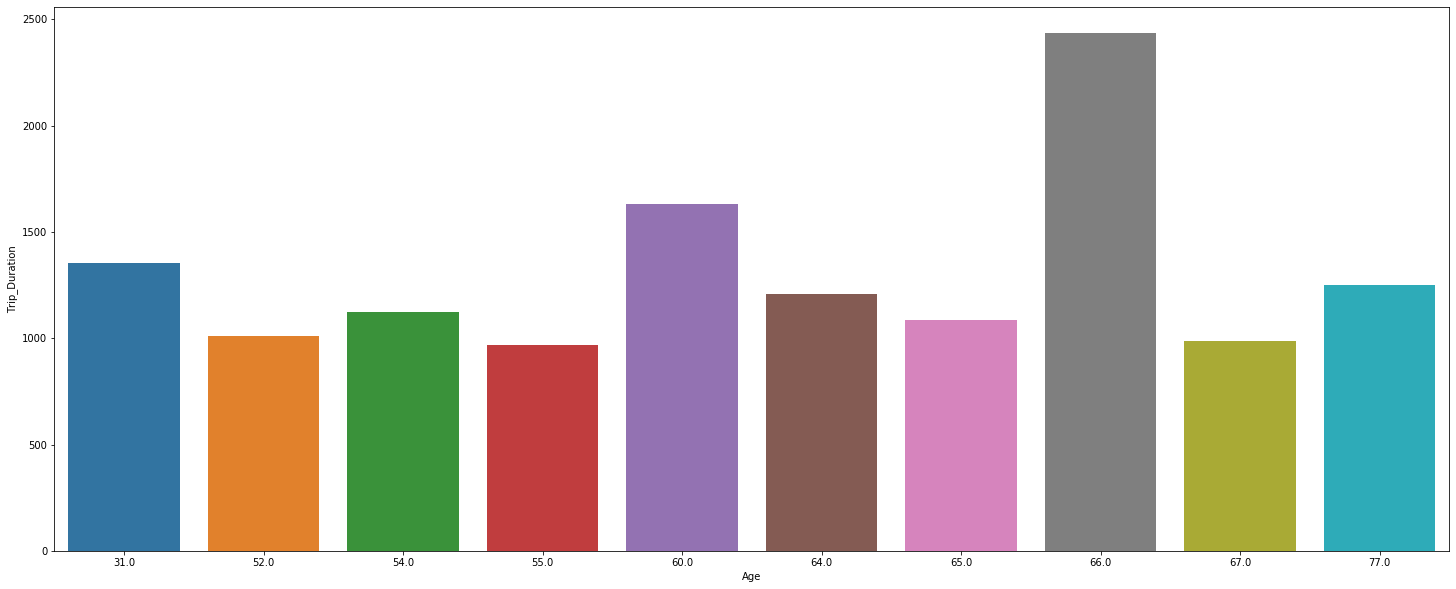

In [65]:
a4_dims = (25, 10)
fig, ax5,= pyplot.subplots(figsize=a4_dims)

ax5 = sns.barplot(data=Top10_mean_dur_perage, x= 'Age', y="Trip_Duration")

Answer :
There is a correlation between age and trip duration, but the correlation value is very small which is close to 0. So it can be concluded that these two variables are not very correlated 

## What are the top 10 pair of stations that our riders use as a start & stopping point?

In [66]:
df_201510['Pair Trip Station Name'] = df_201510["Start Station Name"] +"-"+df_201510["End Station Name"]


In [67]:
df_201510.head()

,Trip_Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,...,Bike ID,User Type,Birth Year,Gender,Age,Label User Type,Duration,Start Day,Start Hour,Pair Trip Station Name
0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,3212,Christ Hospital,40.734786,-74.050444,3207,Oakland Ave,40.737604,...,24470,Subscriber,1960.0,1,61.0,0,00:06:16,Thursday,0,Christ Hospital-Oakland Ave
1,739,2015-10-01 00:27:12,2015-10-01 00:39:32,3207,Oakland Ave,40.737604,-74.052478,3212,Christ Hospital,40.734786,...,24481,Subscriber,1960.0,1,61.0,0,00:12:20,Thursday,0,Oakland Ave-Christ Hospital
2,2714,2015-10-01 00:32:46,2015-10-01 01:18:01,3193,Lincoln Park,40.724605,-74.078406,3193,Lincoln Park,40.724605,...,24628,Subscriber,1983.0,1,38.0,0,00:45:15,Thursday,0,Lincoln Park-Lincoln Park
3,275,2015-10-01 00:34:31,2015-10-01 00:39:06,3199,Newport Pkwy,40.728745,-74.032108,3187,Warren St,40.721124,...,24613,Subscriber,1975.0,1,46.0,0,00:04:35,Thursday,0,Newport Pkwy-Warren St
6,139,2015-10-01 00:43:44,2015-10-01 00:46:03,3206,Hilltop,40.731169,-74.057574,3195,Sip Ave,40.730743,...,24482,Subscriber,1988.0,1,33.0,0,00:02:19,Thursday,0,Hilltop-Sip Ave


In [68]:
df_201510['Pair Trip Station Name'].value_counts(ascending=False)

Brunswick St-Grove St PATH              539
Hamilton Park-Grove St PATH             521
Grove St PATH-Hamilton Park             416
Essex Light Rail-Exchange Place         385
Grove St PATH-Brunswick St              355
Van Vorst Park-Grove St PATH            351
Exchange Place-Essex Light Rail         334
Newport PATH-Hamilton Park              316
Grove St PATH-Van Vorst Park            308
McGinley Square-Sip Ave                 295
Sip Ave-McGinley Square                 238
Grove St PATH-Essex Light Rail          208
Hamilton Park-Newport PATH              203
Newport PATH-Newport Pkwy               182
Newport Pkwy-Newport PATH               145
Sip Ave-Dey St                          144
Van Vorst Park-Exchange Place           142
Grove St PATH-JC Medical Center         140
Sip Ave-Lincoln Park                    138
Newark Ave-Grove St PATH                137
Oakland Ave-Sip Ave                     136
Lincoln Park-Sip Ave                    133
Essex Light Rail-Grove St PATH  

In [69]:
Top10_pair = pd.DataFrame(df_201510['Pair Trip Station Name'].value_counts(ascending=False).head(10))

In [70]:
Top10_pair.reset_index(inplace=True)

In [71]:
Top10_pair.rename(columns={'Pair Trip Station Name': 'Count Pair Trip Station', 'index': 'Pair Trip Station Name'}, inplace=True)

In [72]:
Top10_pair

,Pair Trip Station Name,Count Pair Trip Station
0,Brunswick St-Grove St PATH,539
1,Hamilton Park-Grove St PATH,521
2,Grove St PATH-Hamilton Park,416
3,Essex Light Rail-Exchange Place,385
4,Grove St PATH-Brunswick St,355
5,Van Vorst Park-Grove St PATH,351
6,Exchange Place-Essex Light Rail,334
7,Newport PATH-Hamilton Park,316
8,Grove St PATH-Van Vorst Park,308
9,McGinley Square-Sip Ave,295


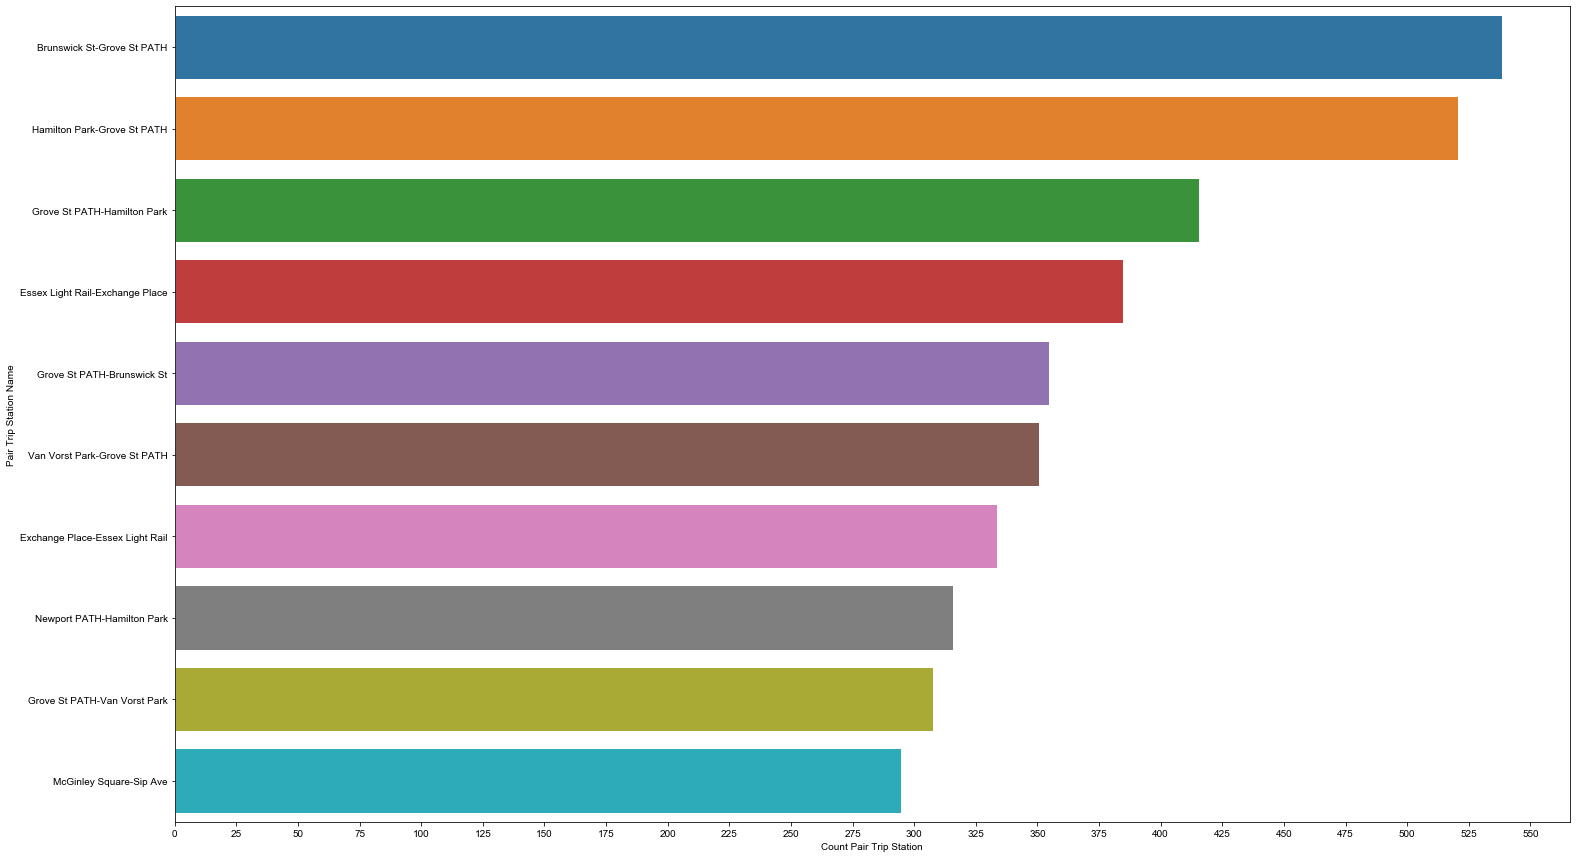

In [73]:
a4_dims = (25, 15)
fig, ax3,= pyplot.subplots(figsize=a4_dims)
sns.set_style("darkgrid")
sns.set_context("poster")

ax3 = sns.barplot(x= 'Count Pair Trip Station', y="Pair Trip Station Name", data=Top10_pair, orient='h')
ax3.set_xticks([0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550])

## Come up with your own question on the Citibike data usage and formulate a hypothesis

### Example:
### "Women are less likely than men to choose biking for commuting."
>
>Null Hypothesis: 

>The proportion of men biking on weekends is the same or higher than the proportion of women biking on weekends



Question : Average Age in top10 pair station ?

Hypotesis : based on previous data, the people who have the most travel duration on average are people with the age of 66 years. The hypothesis is that in these top 10 pair stations, bicycle users come from the age of 66 

## Work with your dataset and show your findings to help answer your question

In [86]:
a = Top10_pair['Pair Trip Station Name'].tolist()

In [87]:
count_user_age = df_201510[['Age', 'Pair Trip Station Name']]

In [88]:
count_user_age.rename(columns={'Pair Trip Station Name': 'Pair_Trip_Station'}, inplace=True)

C:\Users\Karimah\Anaconda2\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [89]:
top10_user_age = count_user_age[count_user_age.Pair_Trip_Station.isin(a) == True]

In [90]:
top10_user_age.shape

(3820, 2)

In [95]:
top10_user_age_groupby = top10_user_age.groupby('Age', as_index=False).Pair_Trip_Station.count()

In [98]:
top10_user_age_groupby.rename(columns={'Pair_Trip_Station': 'Count_Age_In_Top10'}, inplace=True)

In [99]:
top10_user_age_groupby.head()

,Age,Count_Age_In_Top10
0,22.0,2
1,25.0,27
2,26.0,1
3,28.0,1
4,29.0,64


In [102]:
top10_user_age_groupby = top10_user_age_groupby.sort_values('Count_Age_In_Top10', ascending=False).head(10)

In [111]:
top10_user_age_groupby

,Age,Count_Age_In_Top10
15,40.0,367
16,41.0,267
14,39.0,207
20,45.0,202
12,37.0,185
13,38.0,184
26,51.0,169
10,35.0,168
18,43.0,167
11,36.0,165


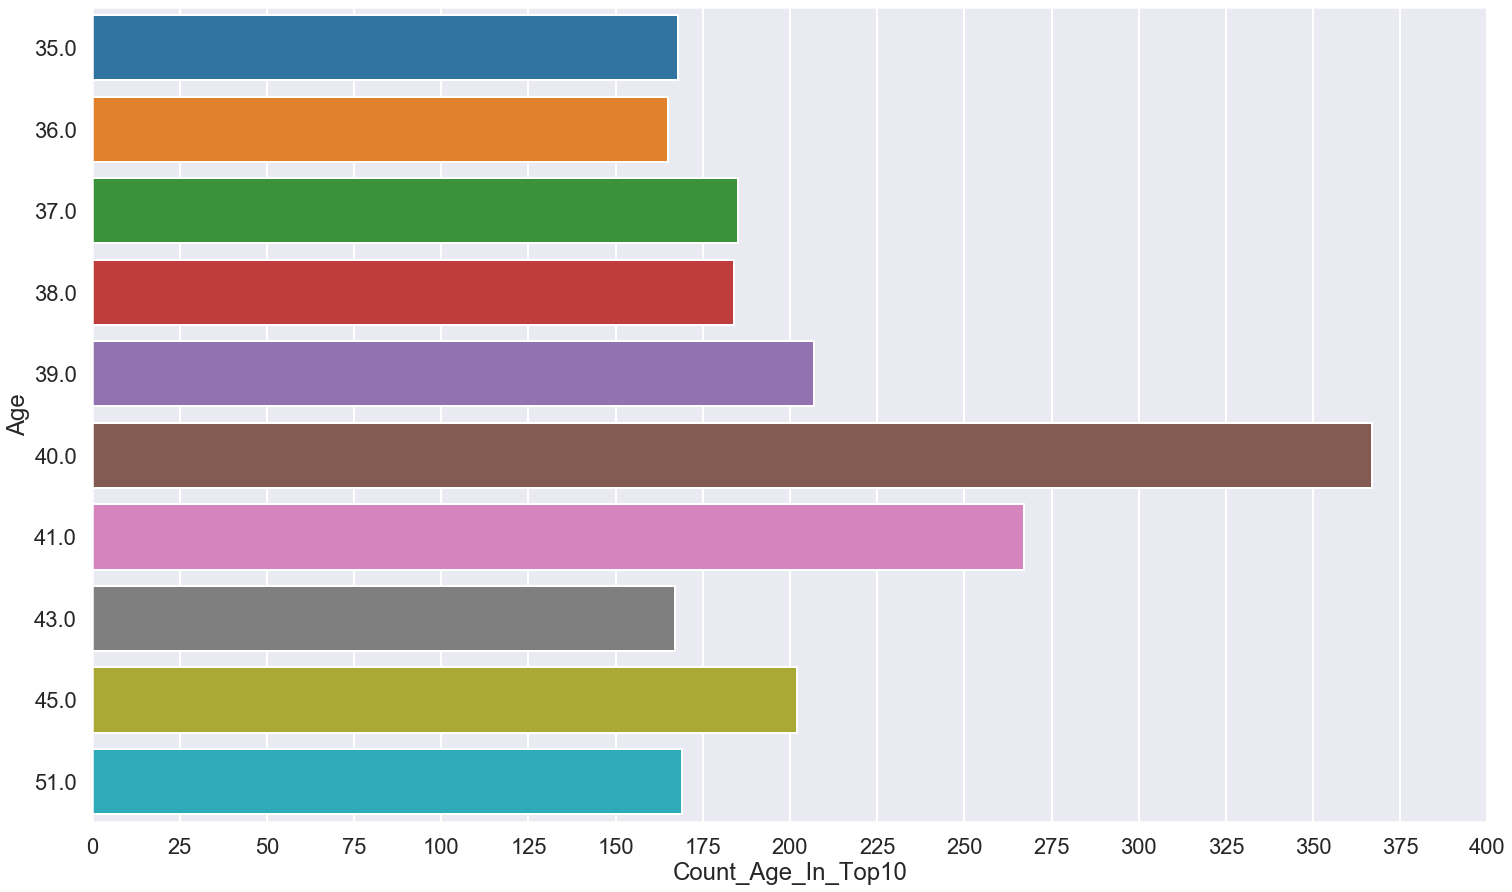

In [110]:
a4_dims = (25, 15)
fig, ax7,= pyplot.subplots(figsize=a4_dims)
sns.set_style("darkgrid")
sns.set_context("poster")

ax7 = sns.barplot(x= 'Count_Age_In_Top10', y="Age", data=top10_user_age_groupby, orient='h')
ax7.set_xticks([0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400])

Answer :
Based on the data, it turns out that the top 10 pair stations are dominated by customers who come from the age group 35-51 years with the highest gains achieved by users aged 40 years

# Submit Instructions
Rename this notebook to `mod2_<first_name>_<last_name>.ipynb` and push this to your branch in module-2 repository

```
git checkout -b tanyani
git add mod2_tanya_nabila.ipynb
git commit -m 'submit mod2 assignment for Tanya Nabila'
git push
```